🧩 Assignment Tasks
✅ Task 1 — Business Understanding
Identify:
The target variable (company’s financial concern)
The input variables related to customer risk
Explain how your regression model helps the company control rising costs, not just predict them.
✅ Task 2 — Data Inspection
Explore the dataset and:
Separate numeric and categorical columns
Identify columns that are not directly usable in regression
Report any data quality issues you observe.
✅ Task 3 — Data Cleaning & Encoding
Convert categorical variables into numeric form.
Decide how to handle:
Region information
Binary attributes like lifestyle indicators
Justify each transformation from a business and modeling perspective.
✅ Task 4 — Feature Scaling & Comparability
Observe differences in value ranges among numeric features.
Explain why scaling is important when comparing regression coefficients.
Prepare the data so the effect of each variable can be fairly interpreted.
⚠️ Task 5 — The Hidden Trap (Multicollinearity)
Analyze relationships between independent variables.
Identify any highly correlated features (example: age, BMI, and lifestyle habits).
Explain:
Why multicollinearity is a problem in Multiple Linear Regression
How it can confuse business decision-making
Take appropriate steps to fix the issue.
✅ Task 6 — Build the Multiple Linear Regression Model
Build a Multiple Linear Regression model using the prepared dataset.
Ensure the model is:
Interpretable
Stable
Suitable for explaining customer cost behavior
✅ Task 7 — Model Evaluation
Evaluate model performance using appropriate regression metrics.
Comment on whether the model is reliable enough to support pricing decisions.

In [25]:
import pandas as pd
import numpy as np
data=pd.read_csv('/Users/toshitha/Downloads/insurance.csv')
print(data.head())
print(data.info())
print(data.describe())
#Separate the numerical columns and categorical columns
numerc_cols=data.select_dtypes(include=['int64','float64']).columns.tolist()
categor_cols=data.select_dtypes(include=['object']).columns.tolist()
print("Numerical Columns:",numerc_cols)
print("Categorical Columns:",categor_cols)


   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
               age          bmi     children       charges
count  1338.000000  1338.000000 

In [26]:
non_usable_cols=['id','name']
non_usable_cols
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [27]:
data['sex']=data['sex'].map({'male':1,'female':0})
data['smoker']=data['smoker'].map({'yes':1,'no':0})

data=pd.get_dummies(data,columns=['region'],drop_first=True)
data.head()


,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,False,False,True
1,18,1,33.770,1,0,1725.55230,False,True,False
2,28,1,33.000,3,0,4449.46200,False,True,False
3,33,1,22.705,0,0,21984.47061,True,False,False
4,32,1,28.880,0,0,3866.85520,True,False,False


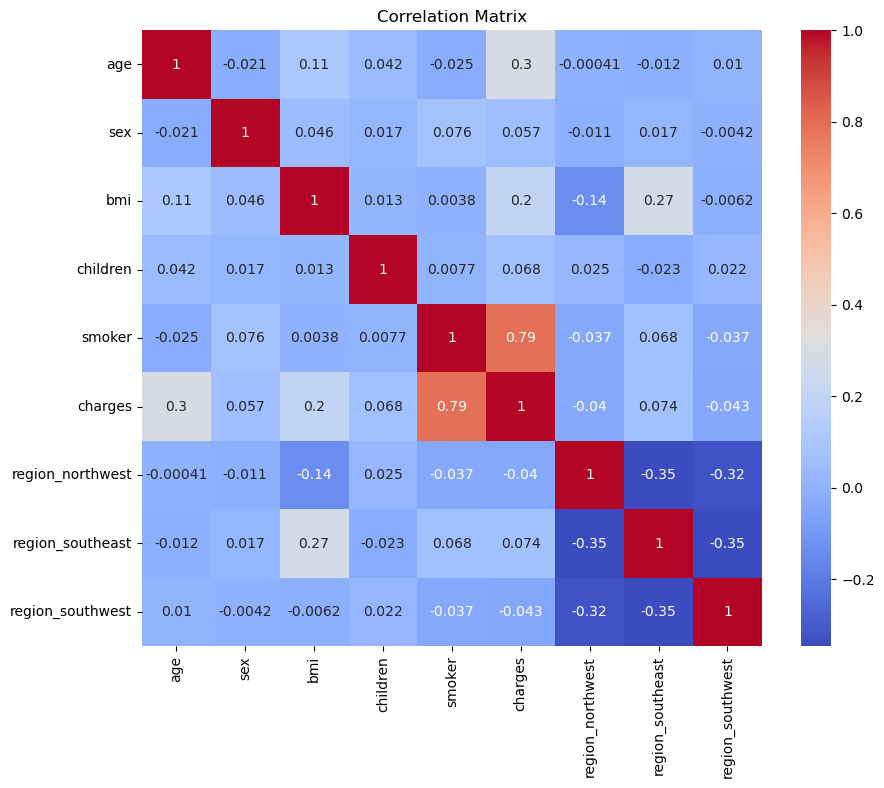

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt
import seaborn as sns
scaler=StandardScaler()
data[['age','bmi','children']]=scaler.fit_transform(data[['age','bmi','children']])
corr_matrix=data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [30]:
X=data.drop('charges',axis=1)
y=data['charges']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.linear_model import LinearRegression       
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print("Mean Squared Error:",mse)
print("R2 Score:",r2)

Mean Squared Error: 33596915.85136146
R2 Score: 0.7835929767120723


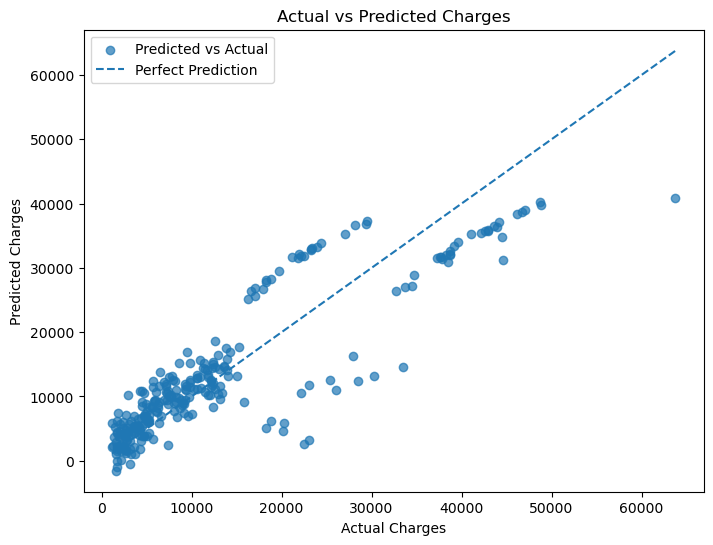

In [ ]:
# The Actual vs Predicted graph visually evaluates the performance of the regression model. A strong clustering of points around the diagonal line indicates good predictive accuracy, while deviations indicate prediction errors that can guide further model improvement.
plt.figure(figsize=(8,6))

plt.scatter(y_test, y_pred, alpha=0.7, label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         linestyle='--', label='Perfect Prediction')

plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted Charges")
plt.legend()
plt.show()
